## Libraries

In [1]:
import pandas as pd
import seaborn as sns

import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.decomposition import PCA

from utils.data_preprocessing import DataPreparer, DataSplitter, DataScaler
from src.config import Config

# Data

In [2]:
config = Config()
df = pd.read_csv("../output/0_data_cleaning/2_cleaned_data_45_countries.csv")
df

,country,year,population,gdp,temperature_change_from_co2,cement_co2,coal_co2,flaring_co2,gas_co2,land_use_change_co2,oil_co2,co2_including_luc
0,Argentina,1928,11139114.0,7.716888e+10,0.004,0.116,8.284,0.000,0.297,228.958,4.041,241.697
1,Argentina,1929,11443159.0,8.069191e+10,0.004,0.174,8.321,0.000,0.458,229.748,4.177,242.878
2,Argentina,1930,11726853.0,7.735969e+10,0.004,0.189,8.119,0.000,0.454,181.910,4.005,194.678
3,Argentina,1931,11989069.0,7.199214e+10,0.004,0.265,6.947,0.000,0.564,150.371,5.067,163.215
4,Argentina,1932,12228636.0,6.962483e+10,0.004,0.247,6.331,0.000,0.769,132.840,5.752,145.940
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,Vietnam,2018,94914328.0,6.815014e+11,0.005,49.637,122.121,1.373,18.554,247.029,66.036,504.751
3995,Vietnam,2019,95776712.0,7.316531e+11,0.006,56.538,191.443,1.453,18.906,248.054,73.449,589.843
3996,Vietnam,2020,96648680.0,7.526296e+11,0.006,60.066,215.817,1.257,16.931,249.736,69.272,613.079
3997,Vietnam,2021,97468024.0,7.719120e+11,0.006,62.071,211.893,0.995,13.757,252.922,63.838,605.475


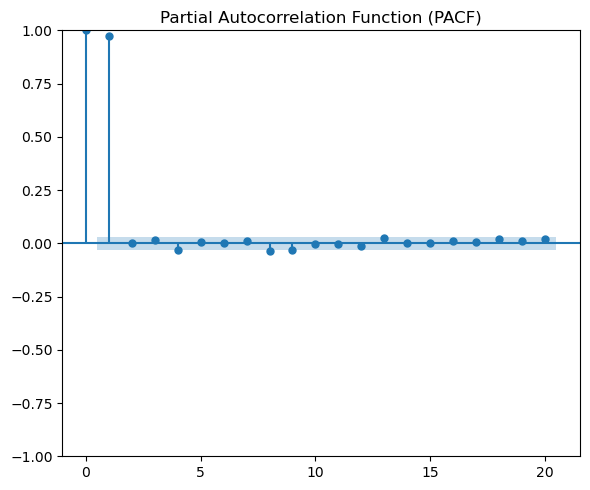

In [3]:
#Partial Autocorrelation Function (PACF) correlogram - indicates which delays are most important when eliminating the influence of previous lags.
time_series = df['co2_including_luc']

fig, ax = plt.subplots(figsize=(6, 5))
sm.graphics.tsa.plot_pacf(time_series, lags=20, ax=ax)

ax.set_title('Partial Autocorrelation Function (PACF)')
plt.tight_layout()
plt.show()

1. Feautre engineering

In [4]:
# Add indexes
df[config.additional_index] = df["country"]
df = df.set_index([config.year_index, config.additional_index])

In [5]:
data_preparer = DataPreparer()

1a. ARIMAX

In [6]:
#ARIMAX with 1 lag
arimax1_df = data_preparer.create_arimax_lightgbm_data(df, config.additional_index)
arimax1_df

,,population,gdp,temperature_change_from_co2,cement_co2_lag_1,coal_co2_lag_1,flaring_co2_lag_1,gas_co2_lag_1,land_use_change_co2_lag_1,oil_co2_lag_1,co2_including_luc
year,country_index,,,,,,,,,,
1929,Argentina,11443159.0,8.069191e+10,0.004,0.116,8.284,0.000,0.297,228.958,4.041,242.878
1930,Argentina,11726853.0,7.735969e+10,0.004,0.174,8.321,0.000,0.458,229.748,4.177,194.678
1931,Argentina,11989069.0,7.199214e+10,0.004,0.189,8.119,0.000,0.454,181.910,4.005,163.215
1932,Argentina,12228636.0,6.962483e+10,0.004,0.265,6.947,0.000,0.564,150.371,5.067,145.940
1933,Argentina,12444339.0,7.285996e+10,0.004,0.247,6.331,0.000,0.769,132.840,5.752,134.144
...,...,...,...,...,...,...,...,...,...,...,...
2018,Vietnam,94914328.0,6.815014e+11,0.005,42.735,108.222,1.733,17.877,254.245,59.076,504.751
2019,Vietnam,95776712.0,7.316531e+11,0.006,49.637,122.121,1.373,18.554,247.029,66.036,589.843
2020,Vietnam,96648680.0,7.526296e+11,0.006,56.538,191.443,1.453,18.906,248.054,73.449,613.079


In [7]:
#ARIMAX with 1 lag + 1 diff
arimax2_df = data_preparer.create_arimax_lightgbm_data(df, config.additional_index, diff_lags=[2])
arimax2_df

,,population,gdp,temperature_change_from_co2,cement_co2_lag_1,coal_co2_lag_1,flaring_co2_lag_1,gas_co2_lag_1,land_use_change_co2_lag_1,oil_co2_lag_1,cement_co2_diff_lag1_lag2,coal_co2_diff_lag1_lag2,flaring_co2_diff_lag1_lag2,gas_co2_diff_lag1_lag2,land_use_change_co2_diff_lag1_lag2,oil_co2_diff_lag1_lag2,co2_including_luc
year,country_index,,,,,,,,,,,,,,,,
1930,Argentina,11726853.0,7.735969e+10,0.004,0.174,8.321,0.000,0.458,229.748,4.177,0.058,0.037,0.000,0.161,0.790,0.136,194.678
1931,Argentina,11989069.0,7.199214e+10,0.004,0.189,8.119,0.000,0.454,181.910,4.005,0.015,-0.202,0.000,-0.004,-47.838,-0.172,163.215
1932,Argentina,12228636.0,6.962483e+10,0.004,0.265,6.947,0.000,0.564,150.371,5.067,0.076,-1.172,0.000,0.110,-31.539,1.062,145.940
1933,Argentina,12444339.0,7.285996e+10,0.004,0.247,6.331,0.000,0.769,132.840,5.752,-0.018,-0.616,0.000,0.205,-17.531,0.685,134.144
1934,Argentina,12663847.0,7.865958e+10,0.004,0.254,5.959,0.000,1.034,120.912,5.985,0.007,-0.372,0.000,0.265,-11.928,0.233,126.606
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018,Vietnam,94914328.0,6.815014e+11,0.005,42.735,108.222,1.733,17.877,254.245,59.076,5.913,1.367,0.167,-2.491,97.840,1.483,504.751
2019,Vietnam,95776712.0,7.316531e+11,0.006,49.637,122.121,1.373,18.554,247.029,66.036,6.902,13.899,-0.360,0.677,-7.216,6.960,589.843
2020,Vietnam,96648680.0,7.526296e+11,0.006,56.538,191.443,1.453,18.906,248.054,73.449,6.901,69.322,0.080,0.352,1.025,7.413,613.079


1b. LightGBM

In [8]:
#LightGBM with 1 lag
lightgbm1_df = data_preparer.create_arimax_lightgbm_data(df, config.additional_index)
lightgbm1_df

,,population,gdp,temperature_change_from_co2,cement_co2_lag_1,coal_co2_lag_1,flaring_co2_lag_1,gas_co2_lag_1,land_use_change_co2_lag_1,oil_co2_lag_1,co2_including_luc
year,country_index,,,,,,,,,,
1929,Argentina,11443159.0,8.069191e+10,0.004,0.116,8.284,0.000,0.297,228.958,4.041,242.878
1930,Argentina,11726853.0,7.735969e+10,0.004,0.174,8.321,0.000,0.458,229.748,4.177,194.678
1931,Argentina,11989069.0,7.199214e+10,0.004,0.189,8.119,0.000,0.454,181.910,4.005,163.215
1932,Argentina,12228636.0,6.962483e+10,0.004,0.265,6.947,0.000,0.564,150.371,5.067,145.940
1933,Argentina,12444339.0,7.285996e+10,0.004,0.247,6.331,0.000,0.769,132.840,5.752,134.144
...,...,...,...,...,...,...,...,...,...,...,...
2018,Vietnam,94914328.0,6.815014e+11,0.005,42.735,108.222,1.733,17.877,254.245,59.076,504.751
2019,Vietnam,95776712.0,7.316531e+11,0.006,49.637,122.121,1.373,18.554,247.029,66.036,589.843
2020,Vietnam,96648680.0,7.526296e+11,0.006,56.538,191.443,1.453,18.906,248.054,73.449,613.079


In [9]:
#LightGBM with 1 lag + 1 diff
lightgbm2_df = data_preparer.create_arimax_lightgbm_data(df, config.additional_index, diff_lags=[2])
lightgbm2_df

,,population,gdp,temperature_change_from_co2,cement_co2_lag_1,coal_co2_lag_1,flaring_co2_lag_1,gas_co2_lag_1,land_use_change_co2_lag_1,oil_co2_lag_1,cement_co2_diff_lag1_lag2,coal_co2_diff_lag1_lag2,flaring_co2_diff_lag1_lag2,gas_co2_diff_lag1_lag2,land_use_change_co2_diff_lag1_lag2,oil_co2_diff_lag1_lag2,co2_including_luc
year,country_index,,,,,,,,,,,,,,,,
1930,Argentina,11726853.0,7.735969e+10,0.004,0.174,8.321,0.000,0.458,229.748,4.177,0.058,0.037,0.000,0.161,0.790,0.136,194.678
1931,Argentina,11989069.0,7.199214e+10,0.004,0.189,8.119,0.000,0.454,181.910,4.005,0.015,-0.202,0.000,-0.004,-47.838,-0.172,163.215
1932,Argentina,12228636.0,6.962483e+10,0.004,0.265,6.947,0.000,0.564,150.371,5.067,0.076,-1.172,0.000,0.110,-31.539,1.062,145.940
1933,Argentina,12444339.0,7.285996e+10,0.004,0.247,6.331,0.000,0.769,132.840,5.752,-0.018,-0.616,0.000,0.205,-17.531,0.685,134.144
1934,Argentina,12663847.0,7.865958e+10,0.004,0.254,5.959,0.000,1.034,120.912,5.985,0.007,-0.372,0.000,0.265,-11.928,0.233,126.606
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018,Vietnam,94914328.0,6.815014e+11,0.005,42.735,108.222,1.733,17.877,254.245,59.076,5.913,1.367,0.167,-2.491,97.840,1.483,504.751
2019,Vietnam,95776712.0,7.316531e+11,0.006,49.637,122.121,1.373,18.554,247.029,66.036,6.902,13.899,-0.360,0.677,-7.216,6.960,589.843
2020,Vietnam,96648680.0,7.526296e+11,0.006,56.538,191.443,1.453,18.906,248.054,73.449,6.901,69.322,0.080,0.352,1.025,7.413,613.079


1c. LSTM

In [10]:
lstm_df = data_preparer.create_lstm_data(df, config.year_range, config.additional_index)
lstm_df

,,country_t-3,population_t-3,gdp_t-3,temperature_change_from_co2_t-3,cement_co2_t-3,coal_co2_t-3,flaring_co2_t-3,gas_co2_t-3,land_use_change_co2_t-3,oil_co2_t-3,...,gdp_t-1,temperature_change_from_co2_t-1,cement_co2_t-1,coal_co2_t-1,flaring_co2_t-1,gas_co2_t-1,land_use_change_co2_t-1,oil_co2_t-1,co2_including_luc_t+1,co2_including_luc_t+2
year_range,country_index,,,,,,,,,,,,,,,,,,,,,
1931-1932,Argentina,Argentina,11139114.0,7.716888e+10,0.004,0.116,8.284,0.000,0.297,228.958,4.041,...,7.735969e+10,0.004,0.189,8.119,0.000,0.454,181.910,4.005,163.215,145.940
1932-1933,Argentina,Argentina,11443159.0,8.069191e+10,0.004,0.174,8.321,0.000,0.458,229.748,4.177,...,7.199214e+10,0.004,0.265,6.947,0.000,0.564,150.371,5.067,145.940,134.144
1933-1934,Argentina,Argentina,11726853.0,7.735969e+10,0.004,0.189,8.119,0.000,0.454,181.910,4.005,...,6.962483e+10,0.004,0.247,6.331,0.000,0.769,132.840,5.752,134.144,126.606
1934-1935,Argentina,Argentina,11989069.0,7.199214e+10,0.004,0.265,6.947,0.000,0.564,150.371,5.067,...,7.285996e+10,0.004,0.254,5.959,0.000,1.034,120.912,5.985,126.606,119.507
1935-1936,Argentina,Argentina,12228636.0,6.962483e+10,0.004,0.247,6.331,0.000,0.769,132.840,5.752,...,7.865958e+10,0.004,0.280,6.581,0.000,1.249,112.366,6.130,119.507,115.143
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-2018,Vietnam,Vietnam,91235504.0,5.195230e+11,0.005,32.694,78.073,1.907,19.599,355.786,49.570,...,5.930066e+11,0.005,36.822,106.855,1.566,20.368,156.405,57.593,483.888,504.751
2018-2019,Vietnam,Vietnam,92191400.0,5.558222e+11,0.005,34.298,97.816,1.818,20.463,211.867,61.067,...,6.341613e+11,0.005,42.735,108.222,1.733,17.877,254.245,59.076,504.751,589.843
2019-2020,Vietnam,Vietnam,93126528.0,5.930066e+11,0.005,36.822,106.855,1.566,20.368,156.405,57.593,...,6.815014e+11,0.005,49.637,122.121,1.373,18.554,247.029,66.036,589.843,613.079


2. Correlation matrix (ARIMAX)

2a. ARIMAX - lag 1

<Axes: >

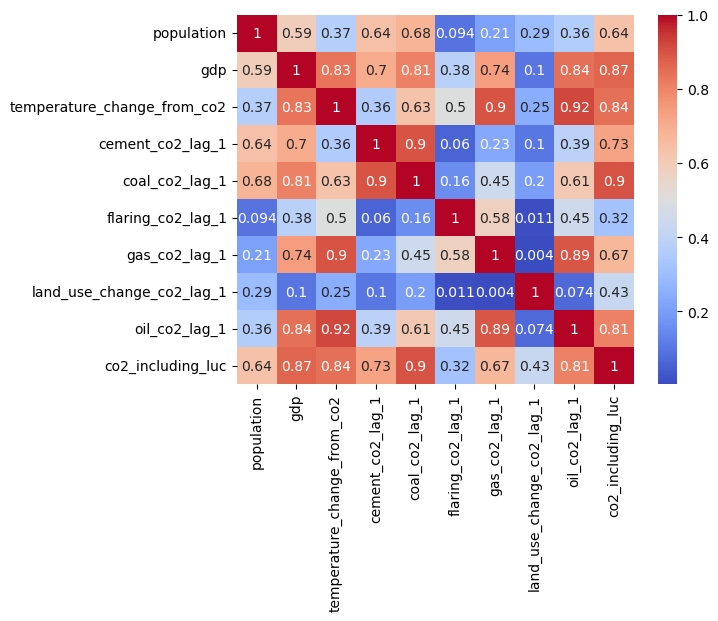

In [11]:
correlation_arimax_matrix = arimax1_df.corr()
sns.heatmap(correlation_arimax_matrix, annot=True, cmap="coolwarm")

In [12]:
# Select only the independent variables (exogenous variables) for which you want to check multicollinearity
X = arimax1_df.drop(columns=['co2_including_luc'], inplace = False)  # Remove the target variable

# Add a constant (intercept) to the independent variables
X = sm.add_constant(X)

# Create a DataFrame to store the VIF values
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif_data

/opt/anaconda3/envs/thesis/lib/python3.9/site-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


,Feature,VIF
0,const,0.000000
1,population,2.344027
2,gdp,13.019185
3,temperature_change_from_co2,25.429801
4,cement_co2_lag_1,15.878078
5,coal_co2_lag_1,18.552298
6,flaring_co2_lag_1,1.615744
7,gas_co2_lag_1,10.363594
8,land_use_change_co2_lag_1,1.810143
9,oil_co2_lag_1,9.826484


2b. ARIMAX - 2 lags

<Axes: >

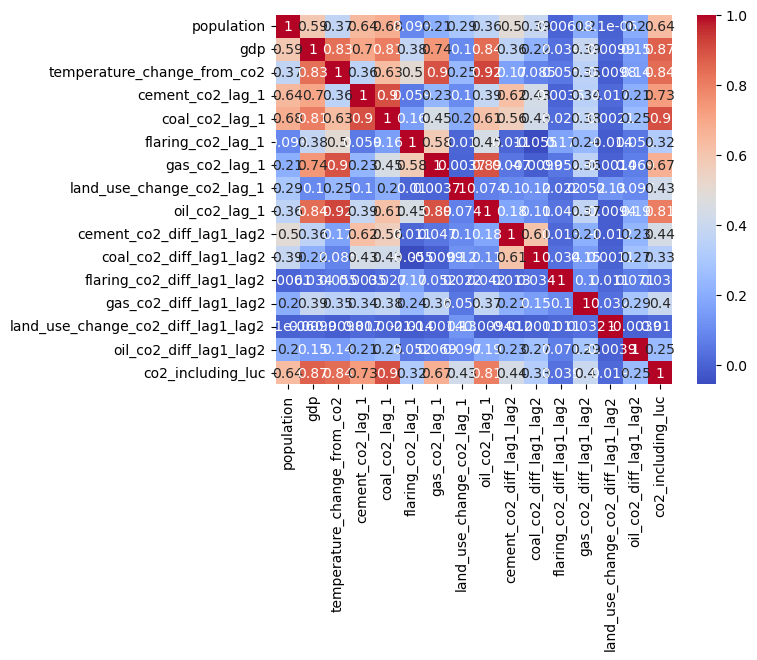

In [13]:
correlation_arimax_matrix = arimax2_df.corr()
sns.heatmap(correlation_arimax_matrix, annot=True, cmap="coolwarm")

In [14]:
# Select only the independent variables (exogenous variables) for which you want to check multicollinearity
X = arimax2_df.drop(columns=['co2_including_luc'], inplace = False)  # Remove the target variable

# Add a constant (intercept) to the independent variables
X = sm.add_constant(X)

# Create a DataFrame to store the VIF values
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif_data

/opt/anaconda3/envs/thesis/lib/python3.9/site-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


,Feature,VIF
0,const,0.000000
1,population,2.483039
2,gdp,13.894462
3,temperature_change_from_co2,26.809061
4,cement_co2_lag_1,17.504096
5,coal_co2_lag_1,19.401979
6,flaring_co2_lag_1,1.687808
7,gas_co2_lag_1,11.013064
8,land_use_change_co2_lag_1,1.918019
9,oil_co2_lag_1,10.466116


3. Split to train and test data

In [15]:
data_splitter = DataSplitter()

In [16]:
#ARIMA lag1
train_arimax1_df, test_arimax1_df = data_splitter.split_data(arimax1_df, config.year_index, config.additional_index)
train_arimax1_df

,,population,gdp,temperature_change_from_co2,cement_co2_lag_1,coal_co2_lag_1,flaring_co2_lag_1,gas_co2_lag_1,land_use_change_co2_lag_1,oil_co2_lag_1,co2_including_luc
year,country_index,,,,,,,,,,
1929,Argentina,11443159.0,8.069191e+10,0.004,0.116,8.284,0.000,0.297,228.958,4.041,242.878
1930,Argentina,11726853.0,7.735969e+10,0.004,0.174,8.321,0.000,0.458,229.748,4.177,194.678
1931,Argentina,11989069.0,7.199214e+10,0.004,0.189,8.119,0.000,0.454,181.910,4.005,163.215
1932,Argentina,12228636.0,6.962483e+10,0.004,0.265,6.947,0.000,0.564,150.371,5.067,145.940
1933,Argentina,12444339.0,7.285996e+10,0.004,0.247,6.331,0.000,0.769,132.840,5.752,134.144
...,...,...,...,...,...,...,...,...,...,...,...
2003,Vietnam,81475816.0,2.682029e+11,0.004,8.274,27.490,1.028,4.100,128.197,28.636,227.212
2004,Vietnam,82311232.0,2.881490e+11,0.004,9.366,31.974,1.214,5.206,149.950,29.501,246.341
2005,Vietnam,83142096.0,3.089886e+11,0.004,10.301,34.792,1.196,8.760,157.402,33.891,206.696


In [17]:
#ARIMA lag1 + diff1
train_arimax2_df, test_arimax2_df = data_splitter.split_data(arimax2_df, config.year_index, config.additional_index)
train_arimax2_df

,,population,gdp,temperature_change_from_co2,cement_co2_lag_1,coal_co2_lag_1,flaring_co2_lag_1,gas_co2_lag_1,land_use_change_co2_lag_1,oil_co2_lag_1,cement_co2_diff_lag1_lag2,coal_co2_diff_lag1_lag2,flaring_co2_diff_lag1_lag2,gas_co2_diff_lag1_lag2,land_use_change_co2_diff_lag1_lag2,oil_co2_diff_lag1_lag2,co2_including_luc
year,country_index,,,,,,,,,,,,,,,,
1930,Argentina,11726853.0,7.735969e+10,0.004,0.174,8.321,0.000,0.458,229.748,4.177,0.058,0.037,0.000,0.161,0.790,0.136,194.678
1931,Argentina,11989069.0,7.199214e+10,0.004,0.189,8.119,0.000,0.454,181.910,4.005,0.015,-0.202,0.000,-0.004,-47.838,-0.172,163.215
1932,Argentina,12228636.0,6.962483e+10,0.004,0.265,6.947,0.000,0.564,150.371,5.067,0.076,-1.172,0.000,0.110,-31.539,1.062,145.940
1933,Argentina,12444339.0,7.285996e+10,0.004,0.247,6.331,0.000,0.769,132.840,5.752,-0.018,-0.616,0.000,0.205,-17.531,0.685,134.144
1934,Argentina,12663847.0,7.865958e+10,0.004,0.254,5.959,0.000,1.034,120.912,5.985,0.007,-0.372,0.000,0.265,-11.928,0.233,126.606
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2003,Vietnam,81475816.0,2.682029e+11,0.004,8.274,27.490,1.028,4.100,128.197,28.636,1.700,2.538,-0.302,1.535,-26.272,3.072,227.212
2004,Vietnam,82311232.0,2.881490e+11,0.004,9.366,31.974,1.214,5.206,149.950,29.501,1.092,4.484,0.186,1.106,21.753,0.865,246.341
2005,Vietnam,83142096.0,3.089886e+11,0.004,10.301,34.792,1.196,8.760,157.402,33.891,0.935,2.818,-0.018,3.554,7.452,4.390,206.696


In [18]:
#lightgbm lag1
train_lightgbm1_df, test_lightgbm1_df = data_splitter.split_data(lightgbm1_df, config.year_index, config.additional_index)
train_lightgbm1_df

,,population,gdp,temperature_change_from_co2,cement_co2_lag_1,coal_co2_lag_1,flaring_co2_lag_1,gas_co2_lag_1,land_use_change_co2_lag_1,oil_co2_lag_1,co2_including_luc
year,country_index,,,,,,,,,,
1929,Argentina,11443159.0,8.069191e+10,0.004,0.116,8.284,0.000,0.297,228.958,4.041,242.878
1930,Argentina,11726853.0,7.735969e+10,0.004,0.174,8.321,0.000,0.458,229.748,4.177,194.678
1931,Argentina,11989069.0,7.199214e+10,0.004,0.189,8.119,0.000,0.454,181.910,4.005,163.215
1932,Argentina,12228636.0,6.962483e+10,0.004,0.265,6.947,0.000,0.564,150.371,5.067,145.940
1933,Argentina,12444339.0,7.285996e+10,0.004,0.247,6.331,0.000,0.769,132.840,5.752,134.144
...,...,...,...,...,...,...,...,...,...,...,...
2003,Vietnam,81475816.0,2.682029e+11,0.004,8.274,27.490,1.028,4.100,128.197,28.636,227.212
2004,Vietnam,82311232.0,2.881490e+11,0.004,9.366,31.974,1.214,5.206,149.950,29.501,246.341
2005,Vietnam,83142096.0,3.089886e+11,0.004,10.301,34.792,1.196,8.760,157.402,33.891,206.696


In [19]:
#lightgbm lag1 + diff1
train_lightgbm2_df, test_lightgbm2_df = data_splitter.split_data(lightgbm2_df, config.year_index, config.additional_index)
train_lightgbm2_df

,,population,gdp,temperature_change_from_co2,cement_co2_lag_1,coal_co2_lag_1,flaring_co2_lag_1,gas_co2_lag_1,land_use_change_co2_lag_1,oil_co2_lag_1,cement_co2_diff_lag1_lag2,coal_co2_diff_lag1_lag2,flaring_co2_diff_lag1_lag2,gas_co2_diff_lag1_lag2,land_use_change_co2_diff_lag1_lag2,oil_co2_diff_lag1_lag2,co2_including_luc
year,country_index,,,,,,,,,,,,,,,,
1930,Argentina,11726853.0,7.735969e+10,0.004,0.174,8.321,0.000,0.458,229.748,4.177,0.058,0.037,0.000,0.161,0.790,0.136,194.678
1931,Argentina,11989069.0,7.199214e+10,0.004,0.189,8.119,0.000,0.454,181.910,4.005,0.015,-0.202,0.000,-0.004,-47.838,-0.172,163.215
1932,Argentina,12228636.0,6.962483e+10,0.004,0.265,6.947,0.000,0.564,150.371,5.067,0.076,-1.172,0.000,0.110,-31.539,1.062,145.940
1933,Argentina,12444339.0,7.285996e+10,0.004,0.247,6.331,0.000,0.769,132.840,5.752,-0.018,-0.616,0.000,0.205,-17.531,0.685,134.144
1934,Argentina,12663847.0,7.865958e+10,0.004,0.254,5.959,0.000,1.034,120.912,5.985,0.007,-0.372,0.000,0.265,-11.928,0.233,126.606
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2003,Vietnam,81475816.0,2.682029e+11,0.004,8.274,27.490,1.028,4.100,128.197,28.636,1.700,2.538,-0.302,1.535,-26.272,3.072,227.212
2004,Vietnam,82311232.0,2.881490e+11,0.004,9.366,31.974,1.214,5.206,149.950,29.501,1.092,4.484,0.186,1.106,21.753,0.865,246.341
2005,Vietnam,83142096.0,3.089886e+11,0.004,10.301,34.792,1.196,8.760,157.402,33.891,0.935,2.818,-0.018,3.554,7.452,4.390,206.696


In [20]:
train_lstm_df, test_lstm_df = data_splitter.split_data(lstm_df, config.year_range, config.additional_index)
train_lstm_df

,,country_t-3,population_t-3,gdp_t-3,temperature_change_from_co2_t-3,cement_co2_t-3,coal_co2_t-3,flaring_co2_t-3,gas_co2_t-3,land_use_change_co2_t-3,oil_co2_t-3,...,gdp_t-1,temperature_change_from_co2_t-1,cement_co2_t-1,coal_co2_t-1,flaring_co2_t-1,gas_co2_t-1,land_use_change_co2_t-1,oil_co2_t-1,co2_including_luc_t+1,co2_including_luc_t+2
year_range,country_index,,,,,,,,,,,,,,,,,,,,,
1931-1932,Argentina,Argentina,11139114.0,7.716888e+10,0.004,0.116,8.284,0.000,0.297,228.958,4.041,...,7.735969e+10,0.004,0.189,8.119,0.000,0.454,181.910,4.005,163.215,145.940
1932-1933,Argentina,Argentina,11443159.0,8.069191e+10,0.004,0.174,8.321,0.000,0.458,229.748,4.177,...,7.199214e+10,0.004,0.265,6.947,0.000,0.564,150.371,5.067,145.940,134.144
1933-1934,Argentina,Argentina,11726853.0,7.735969e+10,0.004,0.189,8.119,0.000,0.454,181.910,4.005,...,6.962483e+10,0.004,0.247,6.331,0.000,0.769,132.840,5.752,134.144,126.606
1934-1935,Argentina,Argentina,11989069.0,7.199214e+10,0.004,0.265,6.947,0.000,0.564,150.371,5.067,...,7.285996e+10,0.004,0.254,5.959,0.000,1.034,120.912,5.985,126.606,119.507
1935-1936,Argentina,Argentina,12228636.0,6.962483e+10,0.004,0.247,6.331,0.000,0.769,132.840,5.752,...,7.865958e+10,0.004,0.280,6.581,0.000,1.249,112.366,6.130,119.507,115.143
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2003-2004,Vietnam,Vietnam,79001144.0,2.203831e+11,0.004,5.628,20.716,1.335,3.063,269.316,23.193,...,2.506834e+11,0.004,8.274,27.490,1.028,4.100,128.197,28.636,227.212,246.341
2004-2005,Vietnam,Vietnam,79817768.0,2.348463e+11,0.004,6.574,24.952,1.330,2.565,154.469,25.564,...,2.682029e+11,0.004,9.366,31.974,1.214,5.206,149.950,29.501,246.341,206.696
2005-2006,Vietnam,Vietnam,80642304.0,2.506834e+11,0.004,8.274,27.490,1.028,4.100,128.197,28.636,...,2.881490e+11,0.004,10.301,34.792,1.196,8.760,157.402,33.891,206.696,189.254


3. Preparing exogenous and target variable for arimax

3a. All columns

a) ARIMAX lag1

In [21]:
# Separate target (y) before scaling
y_train_arimax1 = train_arimax1_df['co2_including_luc']
y_test_arimax1 = test_arimax1_df['co2_including_luc']

y_train_arimax1.to_csv('../output/0_data_cleaning/arimax/lag1/y_train_arimax.csv')
y_test_arimax1.to_csv('../output/0_data_cleaning/arimax/lag1/y_test_arimax.csv')

In [22]:
# Preprocess (scale) only the exogenous variables, excluding the target
exog_train_arimax1 = train_arimax1_df.drop(columns=['co2_including_luc'], inplace = False)
exog_test_arimax1 = test_arimax1_df.drop(columns=['co2_including_luc'], inplace = False)

exog_train_arimax1.to_csv('../output/0_data_cleaning/arimax/lag1/1_exog_train_arimax.csv')
exog_test_arimax1.to_csv('../output/0_data_cleaning/arimax/lag1/1_exog_test_arimax.csv')

b) ARIMAX lag1+diff1

In [23]:
# Separate target (y) before scaling
y_train_arimax2 = train_arimax2_df['co2_including_luc']
y_test_arimax2 = test_arimax2_df['co2_including_luc']

y_train_arimax2.to_csv('../output/0_data_cleaning/arimax/lag1_diff1/y_train_arimax.csv')
y_test_arimax2.to_csv('../output/0_data_cleaning/arimax/lag1_diff1/y_test_arimax.csv')

In [24]:
# Preprocess (scale) only the exogenous variables, excluding the target
exog_train_arimax2 = train_arimax2_df.drop(columns=['co2_including_luc'], inplace = False)
exog_test_arimax2 = test_arimax2_df.drop(columns=['co2_including_luc'], inplace = False)

exog_train_arimax2.to_csv('../output/0_data_cleaning/arimax/lag1_diff1/1_exog_train_arimax.csv')
exog_test_arimax2.to_csv('../output/0_data_cleaning/arimax/lag1_diff1/1_exog_test_arimax.csv')

3b. Exogenous variables chose by using principal component analysis (PCA)

a) ARIMAX lag1

In [25]:
data_preprocessor_arimax1 = DataScaler()
exog_train_arimax1_scaled, exog_test_arimax1_scaled = data_preprocessor_arimax1.preprocess_data(exog_train_arimax1, exog_test_arimax1)

In [26]:
# Apply PCA to the scaled exogenous variables (training data)
pca = PCA(n_components=0.95)  # Keep components that explain 95% of the variance
exog_train_arimax1_pca = pca.fit_transform(exog_train_arimax1_scaled)
exog_test_arimax1_pca = pca.transform(exog_test_arimax1_scaled)

num_components = exog_train_arimax1_pca.shape[1]
component_names = [f"PC{i+1}" for i in range(num_components)]

exog_train_arimax1_pca_df = pd.DataFrame(exog_train_arimax1_pca, columns=component_names, index=exog_train_arimax1.index)
exog_test_arimax1_pca_df = pd.DataFrame(exog_test_arimax1_pca, columns=component_names, index=exog_test_arimax1.index)

exog_train_arimax1_pca_df.to_csv('../output/0_data_cleaning/arimax/lag1/2_exog_train_arimax_pca_df.csv')
exog_test_arimax1_pca_df.to_csv('../output/0_data_cleaning/arimax/lag1/2_exog_test_arimax_pca_df.csv')


b) ARIMAX lag1+diff1

In [27]:
data_preprocessor_arimax2 = DataScaler()
exog_train_arimax2_scaled, exog_test_arimax2_scaled = data_preprocessor_arimax2.preprocess_data(exog_train_arimax2, exog_test_arimax2)

In [28]:
# Apply PCA to the scaled exogenous variables (training data)
pca = PCA(n_components=0.95)  # Keep components that explain 95% of the variance
exog_train_arimax2_pca = pca.fit_transform(exog_train_arimax2_scaled)
exog_test_arimax2_pca = pca.transform(exog_test_arimax2_scaled)

num_components = exog_train_arimax2_pca.shape[1]
component_names = [f"PC{i+1}" for i in range(num_components)]

exog_train_arimax2_pca_df = pd.DataFrame(exog_train_arimax2_pca, columns=component_names, index=exog_train_arimax2.index)
exog_test_arimax2_pca_df = pd.DataFrame(exog_test_arimax2_pca, columns=component_names, index=exog_test_arimax2.index)

exog_train_arimax2_pca_df.to_csv('../output/0_data_cleaning/arimax/lag1_diff1/2_exog_train_arimax_pca_df.csv')
exog_test_arimax2_pca_df.to_csv('../output/0_data_cleaning/arimax/lag1_diff1/2_exog_test_arimax_pca_df.csv')

4. Handle Categorical Variables + Scaling (LightGBM)

a) LightGBM lag1

In [29]:
data_preprocessor_lightgbm1 = DataScaler()
train_lightgbm1_preprocessed, test_lightgbm1_preprocessed = data_preprocessor_lightgbm1.preprocess_data(train_lightgbm1_df, test_lightgbm1_df)

train_lightgbm1_preprocessed.to_csv('../output/0_data_cleaning/lightgbm/lag1/train_lightgbm.csv')
test_lightgbm1_preprocessed.to_csv('../output/0_data_cleaning/lightgbm/lag1/test_lightgbm.csv')

In [32]:
import pickle

# Save the DataScaler object after it has been fitted
with open('../output/0_data_cleaning/lightgbm/lag1/data_preprocessor_lightgbm1.pkl', 'wb') as f:
    pickle.dump(data_preprocessor_lightgbm1, f)

b) LightGBM lag1+diff1

In [30]:
data_preprocessor_lightgbm2 = DataScaler()
train_lightgbm2_preprocessed, test_lightgbm2_preprocessed = data_preprocessor_lightgbm2.preprocess_data(train_lightgbm2_df, test_lightgbm2_df)

train_lightgbm2_preprocessed.to_csv('../output/0_data_cleaning/lightgbm/lag1_diff1/train_lightgbm.csv')
test_lightgbm2_preprocessed.to_csv('../output/0_data_cleaning/lightgbm/lag1_diff1/test_lightgbm.csv')

In [33]:
import pickle

# Save the DataScaler object after it has been fitted
with open('../output/0_data_cleaning/lightgbm/lag1_diff1/data_preprocessor_lightgbm.pkl', 'wb') as f:
    pickle.dump(data_preprocessor_lightgbm2, f)

5. Handle Categorical Variables + Scaling (LSTM)

In [31]:
data_preprocessor_lstm = DataScaler()
train_lstm_preprocessed, test_lstm_preprocessed = data_preprocessor_lstm.preprocess_data(train_lstm_df, test_lstm_df)

train_lstm_preprocessed.to_csv('../output/0_data_cleaning/lstm/train_lstm.csv')
test_lstm_preprocessed.to_csv('../output/0_data_cleaning/lstm/test_lstm.csv')